# Chapter 2: Getting Started (Part B)
**Learning Computer Vision with DSal**

by Ahmad Salehi

Learning how to apply logical operations (AND, OR, XOR, NOT) between image masks using OpenCV to extract or combine image regions, both in grayscale and color images. These techniques are used in image compositing, segmentation, and transparency masking.

In [15]:
## Create basic shapes as masks

square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

- **Creates** a black 300x300 image and draws a white square (value 255) from (50,50) to (250,250).
- **-1** means the shape is filled.

Text(0.5, 1.0, 'Ellipse')

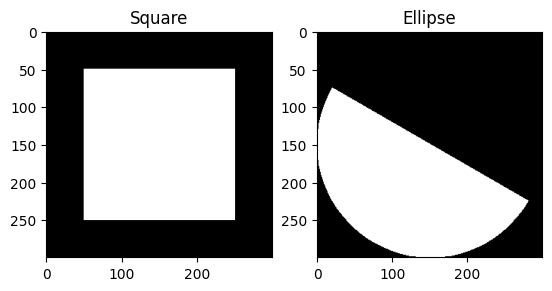

In [16]:
## Making an ellipse

ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)

#Showing the square
plt.subplot(121); plt.imshow(square, cmap='gray'); plt.title("Square")
plt.subplot(122); plt.imshow(ellipse, cmap='gray'); plt.title("Ellipse")        

- Creates a white half-ellipse inside a black canvas.

These are binary masks for bitwise operations.

**Bitwise Operations**

Operrations and descriptions:
- AND → Keeps only overlapping (white) areas between two shapes
- OR → Combines both shapes (any white pixel in either mask stays white)
- XOR → Keeps non-overlapping white areas
- NOT → Inverts the mask (white becomes black and vice versa)

In [17]:
bitwise_and = cv2.bitwise_and(square, ellipse)
bitwise_or = cv2.bitwise_or(square, ellipse)
bitwise_xor = cv2.bitwise_xor(square, ellipse)
bitwise_not = cv2.bitwise_not(square)
bitwise_not_sq = cv2.bitwise_not(square)

Text(0.5, 1.0, 'NOT Square')

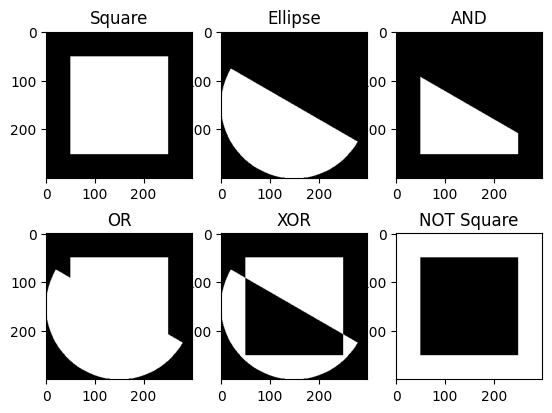

In [19]:
## Visualize Them

plt.subplot(231); plt.imshow(square, cmap='gray'); plt.title("Square")
plt.subplot(232); plt.imshow(ellipse, cmap='gray'); plt.title("Ellipse")        
plt.subplot(233); plt.imshow(bitwise_and, cmap='gray'); plt.title("AND")        
plt.subplot(234); plt.imshow(bitwise_or, cmap='gray'); plt.title("OR")        
plt.subplot(235); plt.imshow(bitwise_xor, cmap='gray'); plt.title("XOR")        
plt.subplot(236); plt.imshow(bitwise_not, cmap='gray'); plt.title("NOT Square")

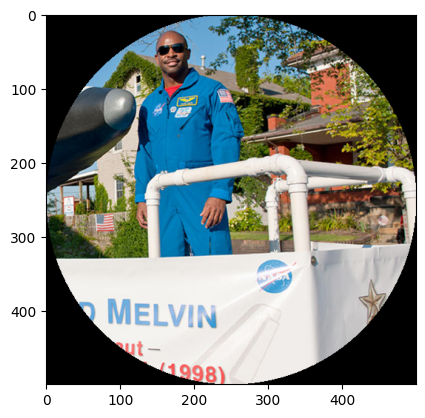

In [50]:
## Bitwise Operations on Colored Images

img = cv2.imread('image01.jpg')
cropped = img[0:500, 200:700]
circle = np.zeros(cropped.shape, np.uint8)
cv2.circle(circle, (250, 250), 250, (255, 255, 255), -1)
output_image = cv2.bitwise_and(cropped, circle)
plt.imshow(output_image[..., ::-1])

- A white-filled circle on a black canvas.
- bitwise_and keeps only parts of the cropped image that fall within the white circle.

In [51]:
## Adding Alpha Channel (PNG with Transparency)

png_image = np.zeros((500, 500, 4), np.uint8)
png_image[:, :, 0:3] = cropped #RGB
circle = np.zeros((500, 500), np.uint8)
cv2.circle(circle, (200, 200), 200, (255, 255, 255), -1)
png_image[:, :, 3] = circle
cv2.imwrite('Output.png', png_image)

True

- Adds an alpha channel to create a transparent PNG.
- White circle becomes fully visible, black is transparent.

In [58]:
## Mini Numeric Bitwise Example

square = np.zeros((10, 10), np.uint8)
cv2.rectangle(square, (2, 2), (8, 8), 2, -1)

circle1 = np.zeros((10, 10), np.uint8)
cv2.circle(circle1, (5, 5), 5, 3, -1)

circle2 = np.zeros((10, 10), np.uint8)
cv2.circle(circle2, (5, 5), 2, 4, -1)

output1 = cv2.bitwise_and(square, circle1)
output2 = cv2.bitwise_and(square, circle2)

print(square)
print(output1)
print(output2)
print(output1 | output2)
print(output1 & output2)
print(output1 ^ output2)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0

- This shows how bitwise logic happens pixel-by-pixel using binary logic.

Learning how to draw geometric shapes and annotations (like lines, rectangles, circles, ellipses, and polygons) using OpenCV functions on both color and grayscale images. These drawings help highlight objects, regions, or add overlays in image processing tasks.

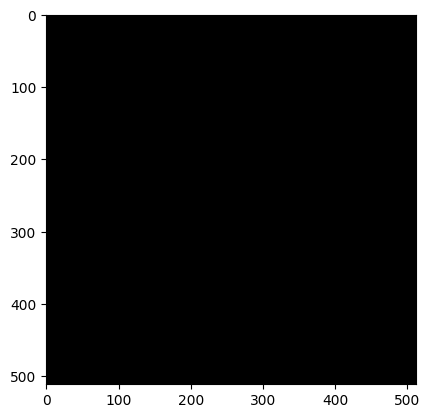

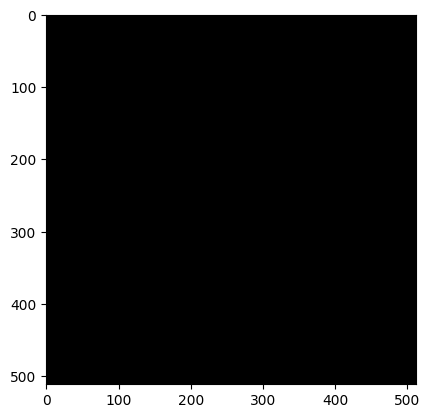

In [71]:
## Creating an Image Canvas

#creating a black image
image = np.zeros((512, 512, 3), np.uint8)

# creating a greyscale image
image_bw = np.zeros((512, 512), np.uint8)

plt.imshow(image[..., ::-1])
plt.figure()
plt.imshow(image_bw, cmap='gray')

- Creates a black image with 3 color channels (BGR).
- All pixel values are 0, hence black.
- uint8 is an 8-bit type, allowing pixel values from 0 to 255.

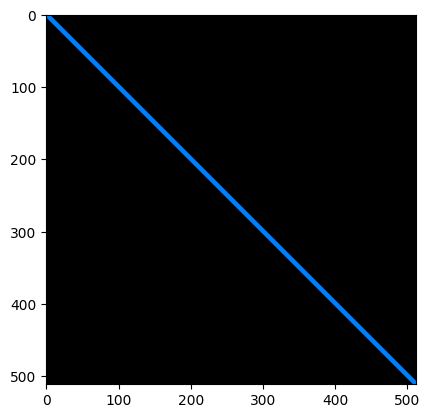

In [73]:
## Drawing a diogonal blue line of thickness of 5 pixels

cv2.line(image, (0, 0), (511, 511), (255, 127, 0), 5)
cv2.imshow('Blue line', image)
plt.imshow(image[..., ::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

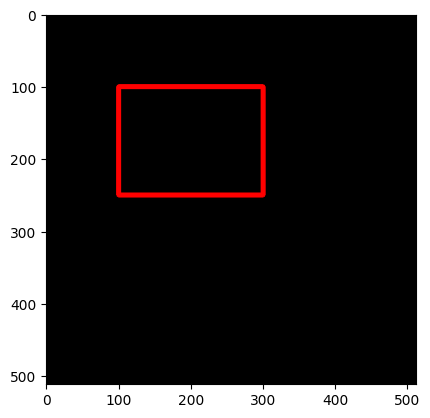

In [74]:
## Drawing a Rectangle

image = np.zeros((512, 512, 3), np.uint8)
cv2.rectangle(image, (100, 100), (300, 250), (0, 0, 255, 0), 5)
cv2.imshow('Rectangle', image)
plt.imshow(image[..., ::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

You can also set thickness to -1 to fill the rectangle.

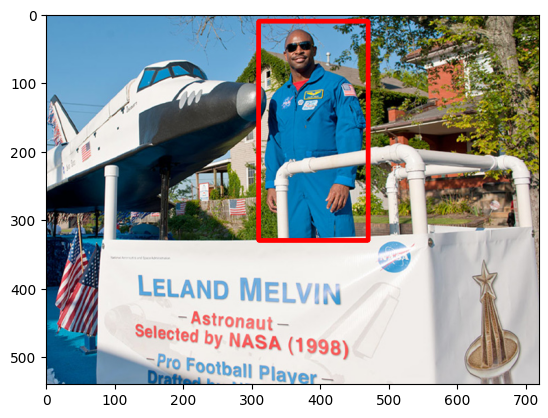

In [ ]:
# Draw a Rectangle on a Real Image

img = cv2.imread('image01.jpg')
cv2.rectangle(img, (310, 10), (470, 330), (0, 0, 255, 0), 5)
plt.imshow(img[..., ::-1])

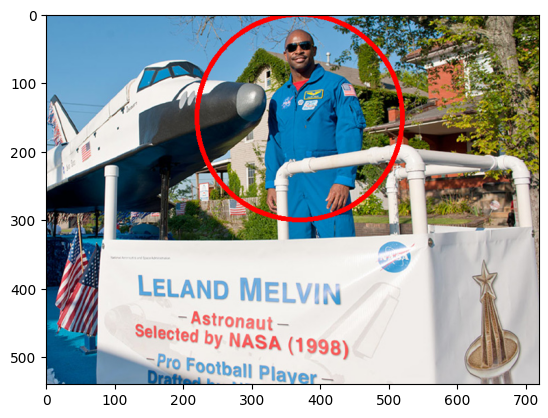

In [94]:
## Drawing a Circle

img = cv2.imread('image01.jpg')
cv2.circle(img, (370, 150), 150, (0, 0, 255, 0), 5)
plt.imshow(img[..., ::-1])

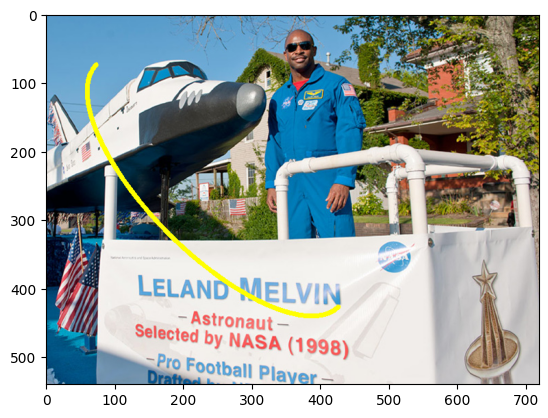

In [112]:
## Drawing an Ellipse

img = cv2.imread('image01.jpg')
cv2.ellipse(img, (250, 250), (250, 100), 45, 0, 180, (0, 255, 255, 0), 5)
plt.imshow(img[..., ::-1])

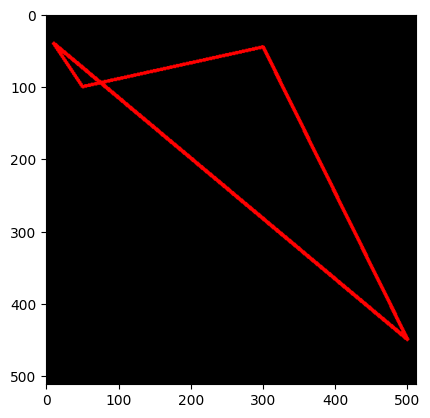

In [110]:
## Drawing Polylines (Custom Shapes)

image = np.zeros((512, 512, 3), np.uint8)
pts = np.array([[10, 40], [50, 100], [300, 45], [500, 450]], np.int32)
pts = pts.reshape((-1, 1, 2))

cv2.polylines(image, [pts], True, (0, 0, 255), 3)
cv2.imshow('Polylines', image)
plt.imshow(image[..., ::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()